# Stable Diffusion with Hugging Face

2024, Denis Rothman   
Written by Denis Rothman and GPT-4o


# Introduction to Hugging Face Stable Diffusion

This notebook provides an educational and hands-on introduction to using **Stable Diffusion** with **Hugging Face's Diffusers library** in a TensorFlow and PyTorch-compatible environment. Stable Diffusion is a powerful text-to-image model that allows you to generate high-quality, detailed images from text prompts. This notebook guides you through each part of the process, from setting up the environment to generating visually stunning art pieces based on creative prompts.

### Key Concepts and Code Breakdown

1. **Library Setup**: The code starts by importing essential libraries including `matplotlib` for image visualization, `tensorflow` for mixed precision settings, and `torch` for leveraging GPU acceleration. It also imports the Stable Diffusion pipeline from Hugging Face's `diffusers` library.

2. **Mixed Precision Management**: To ensure compatibility, the mixed precision policy is explicitly set to `float32`. This prevents potential issues related to precision differences during computations when generating images.

3. **Model Loading**: The Stable Diffusion model is loaded from Hugging Face's repository. We specify `torch_dtype=torch.float16` for faster processing and to reduce memory usage, which is ideal for working with limited GPU resources in Google Colab.

4. **Text Prompts**: The notebook allows users to define their own text prompts. Here, three prompts are provided that describe different fantasy and concept art scenarios. The power of Stable Diffusion lies in its ability to take these prompts and generate corresponding images with impressive quality and coherence.

5. **Image Generation Loop**: A loop is used to generate an image for each prompt. The `torch.autocast("cuda")` context is utilized to ensure that all operations run efficiently on the GPU, taking advantage of mixed precision to boost performance.

6. **Image Visualization**: Finally, the generated images are displayed using `matplotlib`, with each image being shown alongside its corresponding prompt. This helps in visualizing the outcome and understanding how different text prompts translate into visual art.

### How to Use This Notebook
- **Run the Cells Step-by-Step**: Start by running each code cell step-by-step. This will install the necessary packages, load the model, and generate images based on the text prompts provided.
- **Modify the Prompts**: Feel free to edit the prompts in the `prompts` list to experiment with different descriptions. The model can generate a wide range of visual styles, from realistic scenes to abstract, fantasy-themed art.
- **GPU Usage**: Make sure that the runtime type in Google Colab is set to **GPU** (`Runtime > Change runtime type > GPU`). Using a GPU significantly speeds up the image generation process.

By the end of this notebook, you'll have a good understanding of how to leverage **Hugging Face's Stable Diffusion** capabilities to generate art from text prompts, exploring the fascinating intersection of AI and creativity.



# Requirements

Google Colab provides the necessary packages, modules and libraries.
The versions used are displayed in the following cell so that you can install the necessary resources on another platform or locally if necessary.

### Note
- **GPU Usage**: Running Stable Diffusion efficiently requires a GPU. Make sure you have set the runtime type to **GPU** by going to `Runtime > Change runtime type > GPU` in Google Colab.
- **Version Checks**: This cell will verify the installed versions of all required packages to avoid compatibility issues.


In [1]:
## Check Installed Versions and GPU Availability
import torch
import scipy
import transformers # Hugging Face may require an HF API Token
import diffusers
import accelerate

# Display the versions of the installed libraries
print("torch version:", torch.__version__)
print("scipy version:", scipy.__version__)
print("transformers version:", transformers.__version__)
print("diffusers version:", diffusers.__version__)
print("accelerate version:", accelerate.__version__)

# Check if GPU is available
if torch.cuda.is_available():
    print("\nGPU is available and ready to use!")
else:
    print("\nWarning: GPU is not available. Please make sure to enable GPU in Runtime > Change runtime type > GPU for better performance.")



torch version: 2.5.0+cu121
scipy version: 1.13.1
transformers version: 4.44.2
diffusers version: 0.30.3
accelerate version: 0.34.2

GPU is available and ready to use!


# Image Generation

Defining the model and prompt to generate and display the images.

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

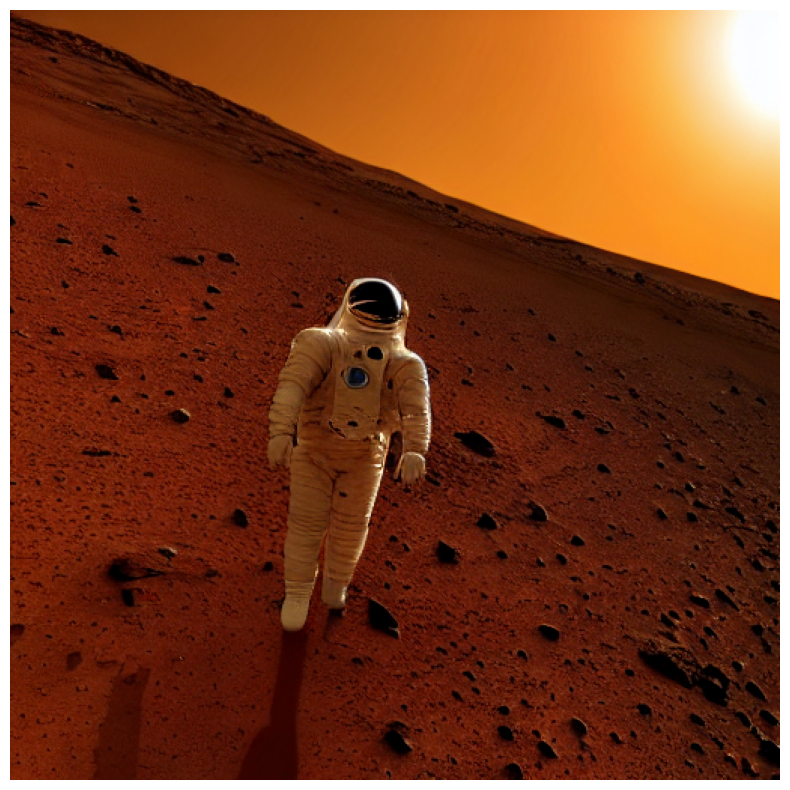

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from diffusers import StableDiffusionPipeline
import torch

# Ensure TensorFlow mixed precision is disabled for compatibility
if tf.keras.mixed_precision.global_policy().name != "float32":
    tf.keras.mixed_precision.set_global_policy("float32")

# Load the Stable Diffusion pipeline from Hugging Face
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipeline = pipeline.to("cuda")

# Define your text prompt
prompt = "photograph of an astronaut walking on Mars towards a sunset"

# Generate an image using the text prompt
with torch.autocast("cuda"):
    image = pipeline(prompt, guidance_scale=7.5).images[0]

# Function to plot the generated image
def plot_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Plot the generated image
plot_image(image)


An example prompt of a "photograph of an astronaut on Mars with a sunset" with a batch of 3 images.

In [3]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'

# A more complex prompt.

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

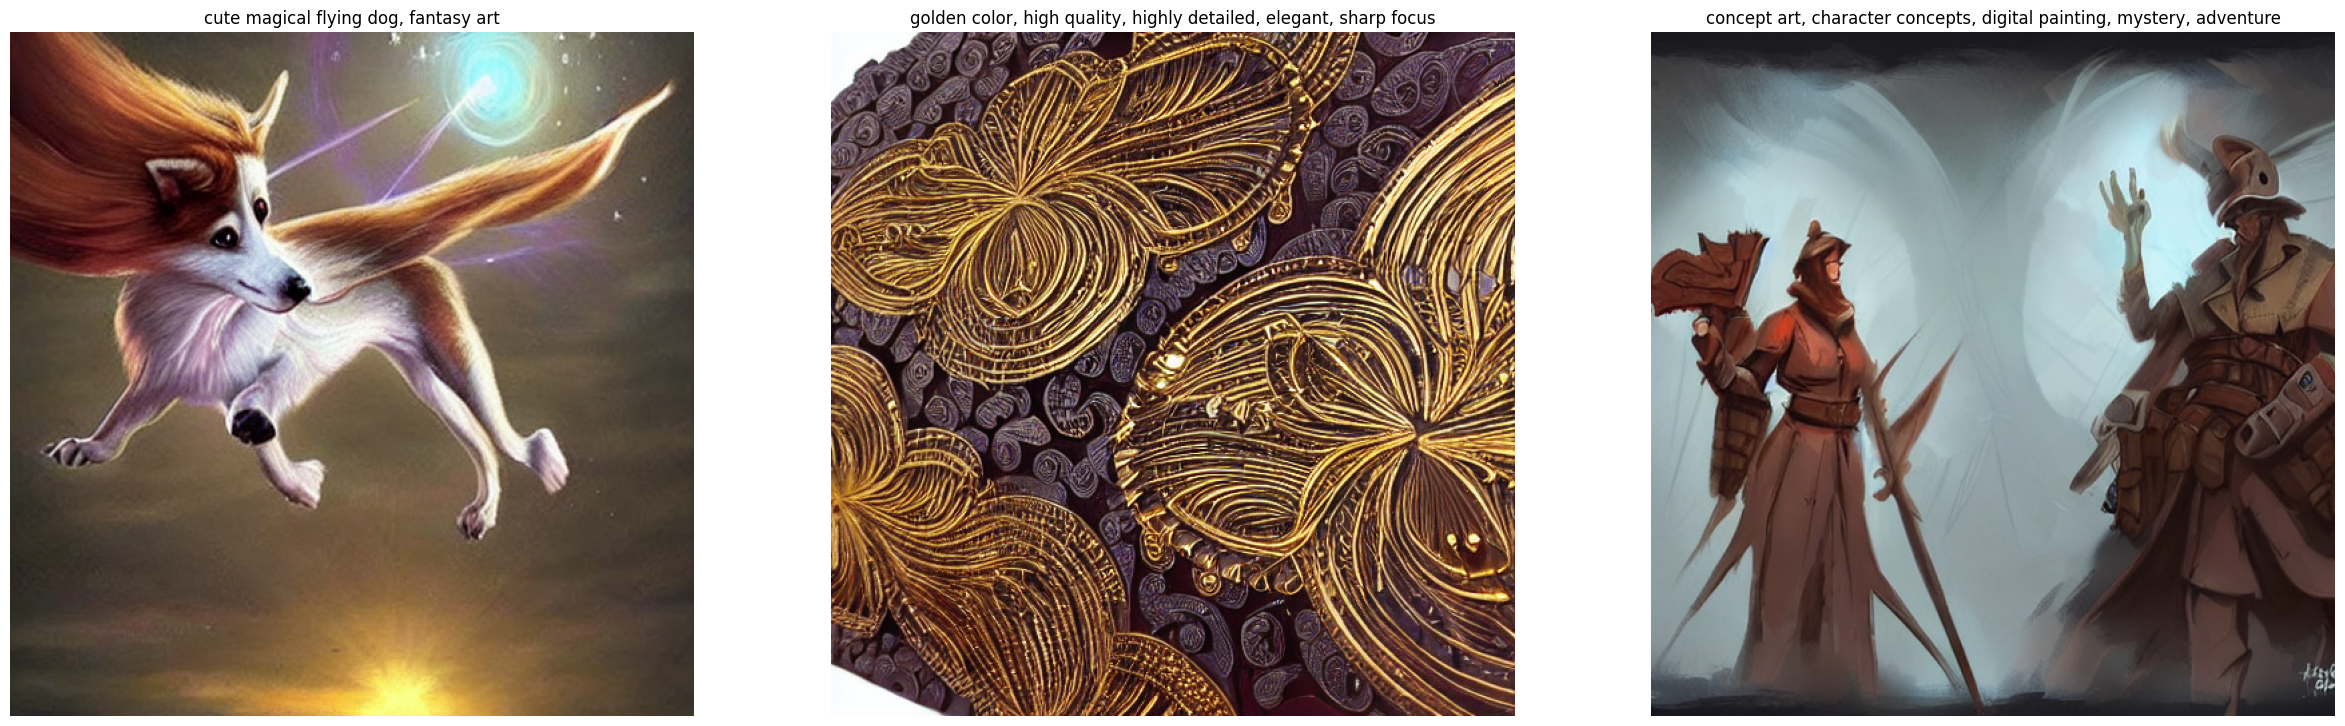

In [4]:
# Define your prompts
prompts = [
    "cute magical flying dog, fantasy art",
    "golden color, high quality, highly detailed, elegant, sharp focus",
    "concept art, character concepts, digital painting, mystery, adventure"
]

# Generate images for each prompt
images = []
with torch.autocast("cuda"):
    for prompt in prompts:
        images.append(pipeline(prompt, guidance_scale=7.5).images[0])

# Function to plot the generated images
def plot_images(images, prompts):
    plt.figure(figsize=(30, 10))
    for i, image in enumerate(images):
        ax = plt.subplot(1, len(images), i + 1)
        ax.set_title(prompts[i], fontsize=12)
        plt.imshow(image)
        plt.axis("off")
    plt.show()

# Plot the generated images
plot_images(images, prompts)